##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [ ]:
#%pip install pandas
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [ ]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catB_train.parquet"
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **ALL** Code for machine learning and dataset analysis should be entered below.
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [ ]:
###...code...###

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization

In [ ]:
df = pd.read_parquet(filepath)

In [ ]:
df

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3363260248,None,Singapore,P,LAPSED,2016-08-01,1994-05-24,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
11964,c3509f0aef,Chinese,Singapore,P,ACTIVE,1990-03-20,1948-12-16,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
5390,6e44cfb3e7,Chinese,Singapore,P,ACTIVE,2007-12-31,1967-12-06,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
860,dd4e362f9f,Others,Singapore,P,ACTIVE,2007-09-01,1986-04-01,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN


## EDA

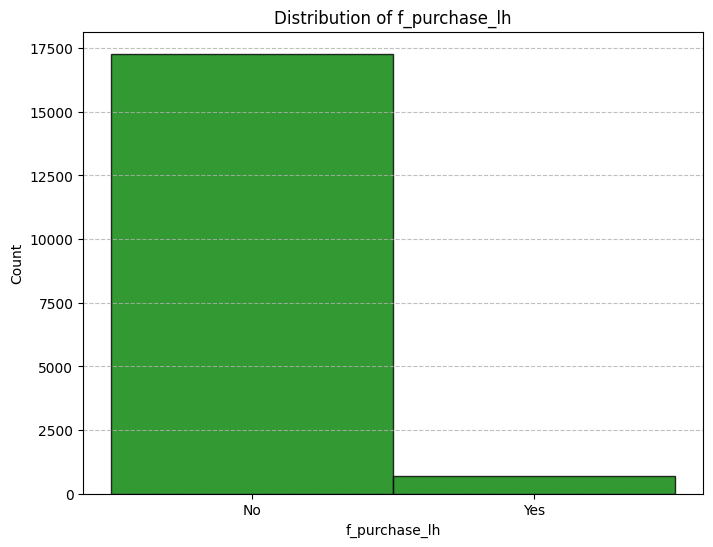

In [ ]:
import matplotlib.pyplot as plt

df_bar = df[["f_purchase_lh"]]
df_bar = df_bar.fillna(0)
f_purchase_lh2 = df_bar['f_purchase_lh']

#histogram of the distribution
plt.figure(figsize=(8, 6))
plt.hist(f_purchase_lh2, bins=[-0.5, 0.5, 1.5], color='green', edgecolor='black', alpha=0.8)
plt.xlabel('f_purchase_lh')
plt.ylabel('Count')
plt.title('Distribution of f_purchase_lh')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()

The histogram above shows the distribution of our target class - "f_purchase_lh" in the original dataframe. From the plot, we can see that the dataset is heavily imbalanced with "Yes" being much less represented than "No". This indicates that "Yes" is the minority class and "No" is the majority class. In this case, downsampling and SMOTE would be necessary as to prevent the model from being biased towards the majority class ("No") due to the severe imblance in classes.

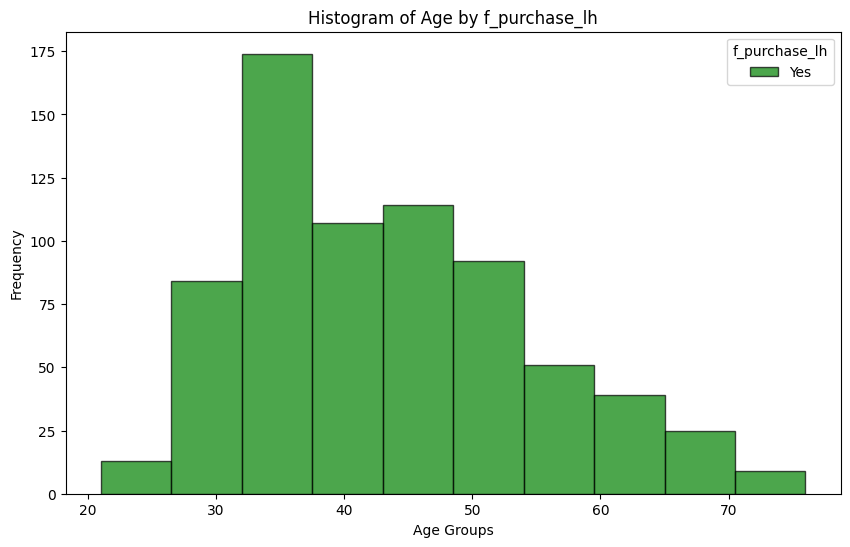

In [ ]:
import warnings
warnings.filterwarnings("ignore")

df_age = df[["cltdob_fix", "f_purchase_lh"]]
df_age["Age"] = pd.to_datetime(df["cltdob_fix"], format="%Y-%m-%d", errors='coerce')
df_age["Age_in_years"] = df_age["Age"].dt.year
df_age["Current_Age"] = 2024 - df_age["Age_in_years"]
category_1 = df_age[df_age["f_purchase_lh"] == 1]["Current_Age"]

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(category_1, bins=10, alpha=0.7, label='Yes', color='g', edgecolor='black')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Histogram of Age by f_purchase_lh')
plt.legend(title = "f_purchase_lh")

We plotted a histogram to visualise the distribution of ages for individuals who have purchased life insurance (‘f_purchase_lh’ =1). As seen from the plot, the frequency of insurance purchases increases with the age of the individual, reaching a peak of around 35 years, and then declines. Singlife can perhaps implement more targeted marketing strategies to individuals aged 40 and older as it is surprising that there is a decline in insurance purchases among this demographic because research has shown that individuals around this age become increasingly susceptible to illnesses.

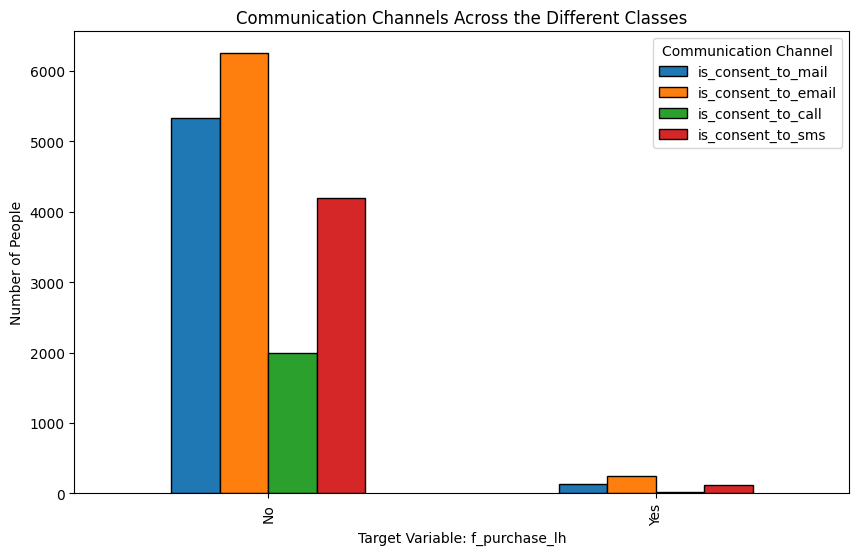

In [ ]:
comms = ['is_consent_to_mail', 'is_consent_to_email', 'is_consent_to_call', 'is_consent_to_sms', "f_purchase_lh"]
df_comms = df[comms]
df_comms = df_comms.fillna(0)
df_comms_summary = df_comms.groupby(["f_purchase_lh"]).agg({
    "is_consent_to_mail" : 'sum',
    "is_consent_to_email" : "sum",
    "is_consent_to_call" : "sum",
    "is_consent_to_sms" : "sum",
})

df_comms_summary.plot(kind="bar", figsize = (10, 6), edgecolor='black')
plt.xlabel("Target Variable: f_purchase_lh")
plt.ylabel("Number of People")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Communication Channels Across the Different Classes")
plt.legend(title = "Communication Channel")

This plot illustrates consumer preferences on communication channels. From the graph, we can see regardless of whether the customer intends to buy life or health insurance products over the next 3 months, email, mail, and SMS are the preferred modes of communication. Calls are the least popular mode of communication amongst consumers. Based on this data, Singlife may consider focusing its marketing efforts on email, mail, and SMS channels as consumers are more likely to see them compared to through phone calls.


### Train-test split

In [ ]:
Y = df["f_purchase_lh"].fillna(0)
Y

X = df.loc[:, df.columns != "f_purchase_lh"]
X


,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,giclaim_amt,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3363260248,None,Singapore,P,LAPSED,2016-08-01,1994-05-24,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
11964,c3509f0aef,Chinese,Singapore,P,ACTIVE,1990-03-20,1948-12-16,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
5390,6e44cfb3e7,Chinese,Singapore,P,ACTIVE,2007-12-31,1967-12-06,Female,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None
860,dd4e362f9f,Others,Singapore,P,ACTIVE,2007-09-01,1986-04-01,Male,0.0,0.0,...,None,NaN,None,None,None,None,None,None,None,None


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 26)

print(f"This is X_train.shape: {X_train.shape}")
print(f"This is Y_train.shape: {Y_train.shape}")
print(f"This is X_test.shape: {X_test.shape}")
print(f"This is Y_test.shape: {Y_test.shape}")


This is X_train.shape: (14393, 303)
This is Y_train.shape: (14393,)
This is X_test.shape: (3599, 303)
This is Y_test.shape: (3599,)


### Data preprocessing

#### There are few steps to this processing:
    
    1. Remove clntnum
    2. Deal with date columns
    3. Settle Categorical Variables
        a) Nominal - one hot encode
        b) ordinal - label encode
    4. Processing product columns
    5. Dropping high NaN columns
    6. Scaling
    7. KnnImputer:
         a. Continuous Variables
         b. Binary Variables: additional step of rounding
    8. Settle Imbalance


##### Feature Engineering and Rationale

We created the column “total_prems_paid” by summing all columns with the ‘prempaid_’ prefix. This allows us to see the sum of premium payments paid by each customer.

We then added a new column called‘LDMU_total_prems_paid’. This column is created by square rooting the ‘total_prems_paid’ column. We consider the law of diminishing marginal utility (LDMU) in this case as buying more premiums is unlikely to add much value to a customer if they have already paid for a lot of premiums. So, we square root the ‘total_prems_paid’ as LDMU is a concave function and the square root function is also a concave one.

A ‘purchasing_power’ column which is the ratio of annual income to household size is also added. This allows us to find out if purchasing power could be a possibility as to why a consumer may or may not want to purchase insurance products.

The column ‘LDMU_Age_Limit’ is created by taking the natural logarithm of the difference between 75 years in days and ‘cltdob_fix’ in days. Values exceeding 75 years are truncated to 0. This is because insurance policies often have an age limit of 75 years old. Taking 75 – the current age of the person will give us an idea of the remaining policy time left for the customer. The natural logarithm is applied due to the law of diminishing marginal utility (LDMU) as we believe that the marginal utility derived from purchasing insurance may diminish as individuals approach the age limit of 75. This is because, they may not have much time left. Since the curve in the law of diminishing marginal utility is concave, we decided to take the natural logarithm so that the variable will also be concave considering the natural logarithm is a concave function.


Preprocessing

1. **Removing clntnum**
The clntnum columns is removed since it is irrelevent to predicting the outptu

2. **Deal with date columns**
The date columns, 'min_occ_date','cltdob_fix', were processed from datetime string to number of days from jan 2024.

3. **Settle Categorical Variables**
The nominal categorical variables are one hot encoded while the ordinal variables are mapped to integer values

4. **Processing product columns**
Based on the f_ever_bought_* columns, if a product is never bought by a customer, we set its values in all related columns to zero for that customer, to standardize the data.
If an f_ever_bought_* column is entirely zero for all rows, no customers has bought it in the data and we therefore remove all columns associated with that product

5. **Dropping high NaN columns**
The proportion of NaN values was computed for each columns and those with the highest proportion was dropped.

6. **Scaling** We scaled all continuous variables to a standard normal distribution, and created a scaler object to apply onto the test set

7. **Imputation**
Using a KNN imputer, we imputed the remaining NaN values by taking the mean of the 5 nearest neighbours.
The imputed binary variables are then rounded off to the nearest 0 or 1.

In [ ]:
# Step 1: Remove clntnum
X_train = X_train.drop('clntnum', axis=1)
X_test = X_test.drop('clntnum', axis=1)

# Step 2: Deal with date columns

# Calculates time column based of 1 jan 2024
def parseDatetime(col):
    col = pd.to_datetime(col, format="%Y-%m-%d", errors='coerce')
    col = pd.to_datetime("2024-01-01") - col
    col = pd.to_numeric(col.dt.days, errors='coerce').astype('Int64')
    return col

datetime_col = ['min_occ_date','cltdob_fix']

for col in datetime_col:
    X_train[col] = parseDatetime(X_train[col]).astype('Int64')
    X_test[col] = parseDatetime(X_test[col]).astype('Int64')

# Step 3
# a) One hot Encode nominal Variables
nominal_cols = ["race_desc", "ctrycode_desc", "clttype", "stat_flag", "cltsex_fix"]
X_train = pd.get_dummies(X_train, columns=nominal_cols)
X_test = pd.get_dummies(X_test, columns=nominal_cols)

ordinal_cols = ["annual_income_est", "hh_size_est"]

# b) Label Encode ordinal variables
le = LabelEncoder()
m = {'C.60K-100K': 3, 'D.30K-60K': 2, 'E.BELOW30K':1, 'B.100K-200K':4, 'A.ABOVE200K' : 5, None: None}
X_train["annual_income_est"] = X_train["annual_income_est"].map(m)
X_test["annual_income_est"] = X_test["annual_income_est"].map(m)
m = {'3': 3, '2': 2, '1':1, '4':4, '>4' : 5, '0' :0, None: None}
X_train["hh_size_est"] = X_train["hh_size_est"].map(m)
X_test["hh_size_est"] = X_test["hh_size_est"].map(m)

# Step 4
#Feature Engineering,
#Create the total_prems_paid, purchasing_power, LDMU_total_prems_paid, and LDMU_Age_Limit columns
#LDMU: model the diminishing utility of certain factors
prem_paid_cols = [s for s in X_train.columns if "prempaid_" in s]
X_train["total_prems_paid"] = X_train[prem_paid_cols].sum(axis = 1)
X_train["LDMU_total_prems_paid"] = X_train["total_prems_paid"]**0.5
X_train['purchasing_power'] = X_train['annual_income_est'] / X_train['hh_size_est']
X_train['LDMU_Age_Limit'] = np.log((75*365) - X_train['cltdob_fix'])
X_train.loc[((75*365 - X_train["cltdob_fix"]) < 0), "LDMU_Age_Limit"] = 0 #Setting those aged 75 years and above to have ln(*) = 0


# Step 5: Match values of product columns based on whether the customers has bought it. Drop product columns that 0 customers have bought
prod_cols = [s for s in X_train.columns if "f_ever_bought_" in s]
prod_names = [s[14:] for s in prod_cols]
sorted_products = sorted(prod_cols, key = lambda x: sum(X_train[x]), reverse = True) #sort my number of users bought
dropped_cols = ['giclaim_cnt_success', "flg_gi_claim_29d435_ever", "flg_gi_claim_058815_ever", "flg_gi_claim_42e115_ever", "flg_gi_claim_856320_ever", 'n_months_last_bought_d0adeb', 'n_months_last_bought_ltc_1280bf', 'n_months_last_bought_inv_dcd836', 'n_months_last_bought_lh_d0adeb', 'lapse_ape_ltc_1280bf', 'lapse_ape_inv_dcd836', 'lapse_ape_lh_d0adeb', 'lapse_ape_32c74c', 'n_months_since_lapse_ltc_1280bf', 'n_months_since_lapse_inv_dcd836', 'n_months_since_lapse_lh_d0adeb', 'n_months_since_lapse_32c74c']
dropped_cols += sorted_products[10:]
X_train = X_train.drop(dropped_cols,axis=1, errors='ignore')

prod_cols = [s for s in X_train.columns if "f_ever_bought_" in s] #after dropping
prod_names = [s[14:] for s in prod_cols]
dropped_f_ever_bought_cols = [s for s in dropped_cols if "f_ever_bought_" in s]
dropped_prod_names = [s[14:] for s in dropped_f_ever_bought_cols]
df_list = []

#match product cols with f_ever_bought. e.g. if f_ever_bought == 0 for a product, set all rows of related columns for that product to 0
for i in prod_names:
    cols_containing_prod_names = [s for s in X_train.columns if i in s and i != "f_ever_bought_"+i]
    f_ever_bought_ = X_train["f_ever_bought_"+i]
    for col in cols_containing_prod_names:
        rows_not_bought = X_train[col][f_ever_bought_==0]
        value_to_match = 0
        '''
        for v in rows_not_bought.unique():
            if not pd.isna(v) and v != 0:
                value_to_match = v
            elif pd.isna(v):
                value_to_match = v
        '''
        X_train[col][f_ever_bought_==0] = X_train[col][f_ever_bought_==0].apply(lambda x: value_to_match)

#if f_ever_bought == 0 for a product, for all rows, remove all columns related to that product
col_to_drop = []
for i in dropped_prod_names:
    col_to_drop += [s for s in X_train.columns if i in s]
X_train = X_train.drop(col_to_drop,axis=1, errors='ignore')

#drop remaining high nan cols
na_ratio = []
for column in X_train.columns:
    num_zero = (pd.isna(X_train[column])).sum()
    tot_ele = len(X_train[column])
    na_ratio += [(column, num_zero / tot_ele)]

na_ratio = sorted(na_ratio, key =lambda x: x[1], reverse = True)
drop_high_nan = [s[0] for s in na_ratio[:29]]
X_train = X_train.drop(drop_high_nan,axis=1, errors='ignore')


# Step 6
object_columns = X_train.select_dtypes(include=['object']).columns
for c in object_columns:
    X_train[c] = pd.to_numeric(X_train[c], errors='coerce')
    # print(X_train[c].unique())


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:559: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
<ipython-input-128-222d310326f5>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col][f_ever_bought_==0] = X_train[col][f_ever_bought_==0].apply(lambda x: value_to_match)
<ipython-input-128-222d310326f5>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col][f_ever_bought_==0] = X_train[col][f_ever_bought_==0].apply(lambda x: value_to_match)
<ipython-input-128-222d310326f5>:75: SettingWithCopyWarning: 
A value is trying to be s

In [ ]:
#Step 7
#Scaling Continuous Variables
#Scale all continuous variable to a standard normal distribution, and create scaler to apply on test set
binary_columns = X_train.columns[(X_train.eq(0) | X_train.eq(1) | X_train.isna()).all()]
continuous_columns = [s for s in X_train.columns if s not in binary_columns]
X_train_continuous = X_train[continuous_columns]
X_train_binary = X_train[binary_columns]
scaler = StandardScaler()
scaler.fit(X_train_continuous)
columns = X_train_continuous.columns
X_train_continuous = scaler.transform(X_train_continuous)
X_train_continuous = pd.DataFrame(X_train_continuous, columns=continuous_columns)
X_train_binary = X_train_binary.reset_index(drop=True)
X_train = pd.concat([X_train_binary,X_train_continuous], axis=1)

In [ ]:
#Step 8
#Imputation
#Impute Nan values using KNN
#Round imputed binary variables to 0 or 1.
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
columns = pd.concat([X_train_binary,X_train_continuous], axis=1).columns
X_train_presampled = pd.DataFrame(X_train, columns = columns)
X_train_presampled[binary_columns] = X_train_presampled[binary_columns].round(decimals=0)

,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,flg_is_returned_mail,...,n_months_last_bought_grp_1581d7,n_months_last_bought_lh_e22a6a,n_months_last_bought_grp_70e1dd,n_months_last_bought_lh_947b15,recency_clmcon_regis,giclaim_amt,recency_giclaim,total_prems_paid,LDMU_total_prems_paid,LDMU_Age_Limit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335687,-0.429004,-0.353946,-0.200852,-0.050737,-0.055001,-0.130722,-0.357394,-0.858396,0.550143
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335687,-0.429004,-0.353946,-0.200852,-0.050737,-0.055001,-0.130722,-0.357394,-0.858396,-0.096391
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.273740,-0.429004,-0.291908,-0.200852,-0.050737,-0.055001,-0.130722,-0.276682,-0.232105,0.631618
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335687,-0.429004,-0.353946,-0.200852,-0.050737,-0.055001,-0.130722,-0.357394,-0.858396,-1.944941
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335687,-0.429004,-0.353946,-0.200852,-0.050737,-0.055001,-0.130722,-0.357394,-0.858396,-0.955768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335687,-0.429004,-0.353946,-0.200852,-0.050737,-0.055001,-0.130722,0.155060,0.719703,0.524618
14389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.166523,-0.429004,1.150471,-0.200852,-0.050737,-0.055001,-0.130722,-0.121046,0.213326,0.579644
14390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.335687,-0.429004,-0.353946,-0.200852,-0.050737,-0.055001,-0.130722,0.763695,1.475744,0.056217
14391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.343513,-0.429004,2.329190,-0.200852,-0.050737,-0.055001,-0.130722,0.216322,0.811368,0.487232


In [ ]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

# summarize class distribution
counter = Counter(Y_train)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.4, random_state=1)
under = RandomUnderSampler(sampling_strategy=0.4, random_state=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_balanced, Y_train_balanced = pipeline.fit_resample(X_train_presampled, Y_train)
# summarize the new class distribution
counter = Counter(Y_train_balanced)
print(counter)

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list).
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame, ) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform.

All relevant code MUST be included in this function.'''
    X_test = hidden_data.drop(["f_purchase_lh"], axis=1)
    Y_test = hidden_data['f_purchase_lh']

    # preprocess
    # Step 1: Remove clntnum
    X_test = X_test.drop('clntnum', axis=1)
    # X_test = X_test.drop('clntnum', axis=1)

    # Step 2: Deal with date columns

    # Calculates time column based of 1 jan 2024
    def parseDatetime(col):
        col = pd.to_datetime(col, format="%Y-%m-%d", errors='coerce')
        col = pd.to_datetime("2024-01-01") - col
        col = pd.to_numeric(col.dt.days, errors='coerce').astype('Int64')
        return col

    datetime_col = ['min_occ_date','cltdob_fix']

    for col in datetime_col:
        X_test[col] = parseDatetime(X_test[col]).astype('Int64')
        # X_test[col] = parseDatetime(X_test[col]).astype('Int64')

    # Step 3
    # a) One hot Encode nominal Variables
    nominal_cols = ["race_desc", "ctrycode_desc", "clttype", "stat_flag", "cltsex_fix"]
    X_test = pd.get_dummies(X_test, columns=nominal_cols)

    ordinal_cols = ["annual_income_est", "hh_size_est"]

    # b) Label Encode ordinal variables
    le = LabelEncoder()
    m = {'C.60K-100K': 3, 'D.30K-60K': 2, 'E.BELOW30K':1, 'B.100K-200K':4, 'A.ABOVE200K' : 5, None: None}
    X_test["annual_income_est"] = X_test["annual_income_est"].map(m)
    m = {'3': 3, '2': 2, '1':1, '4':4, '>4' : 5, '0' :0, None: None}
    X_test["hh_size_est"] = X_test["hh_size_est"].map(m)

    # Step 4: Feature Engineering
    prem_paid_cols = [s for s in X_test.columns if "prempaid_" in s]
    X_test["total_prems_paid"] = X_test[prem_paid_cols].sum(axis = 1)
    X_test["LDMU_total_prems_paid"] = X_test["total_prems_paid"]**0.5
    X_test['purchasing_power'] = X_test['annual_income_est'] / X_train['hh_size_est']
    X_test['LDMU_Age_Limit'] = np.log((75*365) - X_train['cltdob_fix'])
    X_test.loc[((75*365 - X_test["cltdob_fix"]) < 0), "LDMU_Age_Limit"] = 0 #Setting those aged 75 years and above to have ln(*) = 0

    result = []
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!